In [4]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

## Define help functions

In [5]:
def show_img(img):
  print(np.max(img))
  plt.imshow(img,cmap=plt.get_cmap('gray_r'))
  plt.show()

def draw_contours(img,contour):
  h,w=img.shape
  plt.imshow(img,cmap=plt.get_cmap('gray_r'))
  for i in range(8):
    plt.plot(np.arange(w),contour[i])
  plt.show()
  
def get_valid_channels(manualFluid):
  manualFluid_ids=[]
  for channel in range(len(manualFluid[0,0])):
    c=manualFluid[:,:,channel]
    if not np.any(np.isnan(c)):
      manualFluid_ids.append(channel)
  return manualFluid_ids

def show_layer_fluid(img,fluid,layer):
  org_img=img.copy()
  h,w=org_img.shape
  for i in range(h):
    for j in range(w):
      if fluid[i,j]!=0:
        org_img[i,j]=100
  draw_contours(org_img,layer)

## Load data, fill fluids, draw layers

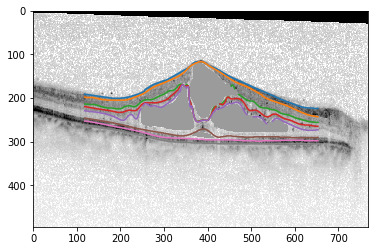

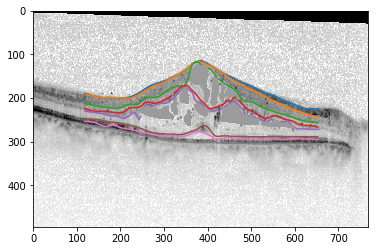

In [6]:
data_path="2015_BOE_Chiu/Subject_01.mat"
data=sio.loadmat(data_path)

#automaticFluidDME=data["automaticFluidDME"]
#automaticLayersDME=data["automaticLayersDME"]
#automaticLayersNormal=data["automaticLayersNormal"]
images=data["images"]
manualFluid1=data["manualFluid1"]
manualFluid2=data["manualFluid2"]
manualLayers1=data["manualLayers1"]
manualLayers2=data["manualLayers2"]

manualFluid1_ids=get_valid_channels(manualFluid1)
manualFluid2_ids=get_valid_channels(manualFluid2)

if manualFluid1_ids!=manualFluid2_ids:
  raise(data_path+" label id diffenert")

for c in manualFluid1_ids:
  c=manualFluid1_ids[5]
  mid_img=images[:,:,c]
  
  mid_fluid1=manualFluid1[:,:,c]
  mid_fluid2=manualFluid2[:,:,c]
  mid_layer1=manualLayers1[:,:,c]
  mid_layer2=manualLayers2[:,:,c]
#  show_img(mid_img)
#  show_img(mid_fluid1)
#  show_img(mid_fluid2)
#  
#  draw_contours(mid_img,mid_layer1)
#  draw_contours(mid_img,mid_layer2)
  show_layer_fluid(mid_img,mid_fluid1,mid_layer1)
  show_layer_fluid(mid_img,mid_fluid2,mid_layer2)
  break